### <b> Supervised Learning

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### task_#1

In [28]:
boston = load_boston()
X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(boston['target'], columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

linear_r2 = r2_score(y_test, y_pred)
print(linear_r2)


0.711226005748496


### task_#2

In [76]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

model.fit(X_train, y_train.values[:, 0])

y_pred = model.predict(X_test)

random_forest_r2 = r2_score(y_test, y_pred)
print(random_forest_r2)

0.87472606157312


### task_#3

Сумма всех показателей важности = 1.0


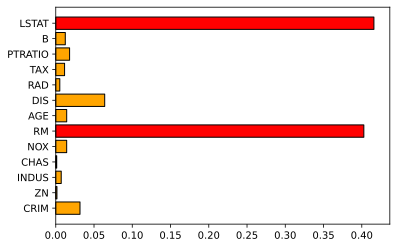

In [101]:
importance = model.feature_importances_
features = boston['feature_names']
print(f'Сумма всех показателей важности = {np.sum(importance)}')
patches = plt.barh(features, importance, ec = 'black', color = 'orange', )
patches[12].set_fc('r')
patches[5].set_fc('r')
"""
LSTAT    % lower status of the population
RM       average number of rooms per dwelling
""";

### task_4

In [142]:
df = pd.read_csv('creditcard.csv')
pd.options.display.max_columns = 100 #зачем 100, если их там 31
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [156]:
X = df.drop(labels = ['Class'], axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)
print(f'X_train = {X_train.shape}\nX_test = {X_test.shape}\ny_train = {y_train.shape}\ny_test = {y_test.shape}')

parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]


estimator = RandomForestClassifier(random_state = 100)
model = GridSearchCV(estimator, param_grid = parameters, scoring = 'roc_auc', cv = 3)

model.fit(X_train, y_train)


X_train = (199364, 30)
X_test = (85443, 30)
y_train = (199364,)
y_test = (85443,)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [159]:
model.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [178]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_train_proba = model.predict_proba(X_train)[:, 1]

In [179]:
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
roc_auc_train = roc_auc_score(y_train, y_train_proba)
print(f'roc_auc_test = {roc_auc_test}\nroc_auc_train = {roc_auc_train}')

roc_auc_test = 0.9462664156037156
roc_auc_train = 0.9703527882554751


### <b>Repetition

In [6]:
from sklearn.datasets import load_wine
import seaborn as sb

### task_#1_#2_#3

In [7]:
data = load_wine()
data_keys = dir(data)
#print(data['DESCR'])
print(f"Целевая переменная содержит {len(data['feature_names'])} классов")
for cl in data['feature_names']:
    print(f'\t▲ {cl}')

Целевая переменная содержит 13 классов
	▲ alcohol
	▲ malic_acid
	▲ ash
	▲ alcalinity_of_ash
	▲ magnesium
	▲ total_phenols
	▲ flavanoids
	▲ nonflavanoid_phenols
	▲ proanthocyanins
	▲ color_intensity
	▲ hue
	▲ od280/od315_of_diluted_wines
	▲ proline


### task_#5

In [8]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])


### task_#6

In [9]:
print(f"Размер датафрейма = {X.shape}")
strings_num = str(X.shape[0])
null_columns = []

with open('non_null_counts.txt', 'w') as f:
    X.info(buf = f)
with open('non_null_counts.txt', 'r') as f:
    x_info = f.read().split('\n')

for i in range(5, 5+X.shape[1]):
    if x_info[i][35:38] != strings_num:
        null_columns.append(i-5)

print(f'Количество столбцов с NULL-значениями = {len(null_columns)}')

Размер датафрейма = (178, 13)
Количество столбцов с NULL-значениями = 0


### task_#7

In [44]:
X['target'] = pd.Series(data['target'], dtype = np.int64)

### task_#8

In [45]:
X_corr = X.corr()

### task_#9

In [46]:
high_corr = X_corr['target'][abs(X_corr['target']) > 0.5].drop(labels = 'target')

### task_#10

In [ ]:
X.drop(labels = ['target'], inplace = True, axis = 1)
for label in high_corr.index:
    X[label + '_2'] = pd.Series(X[label]**2)
X.describe()

### <b>Heatmap of Correlation Matrix

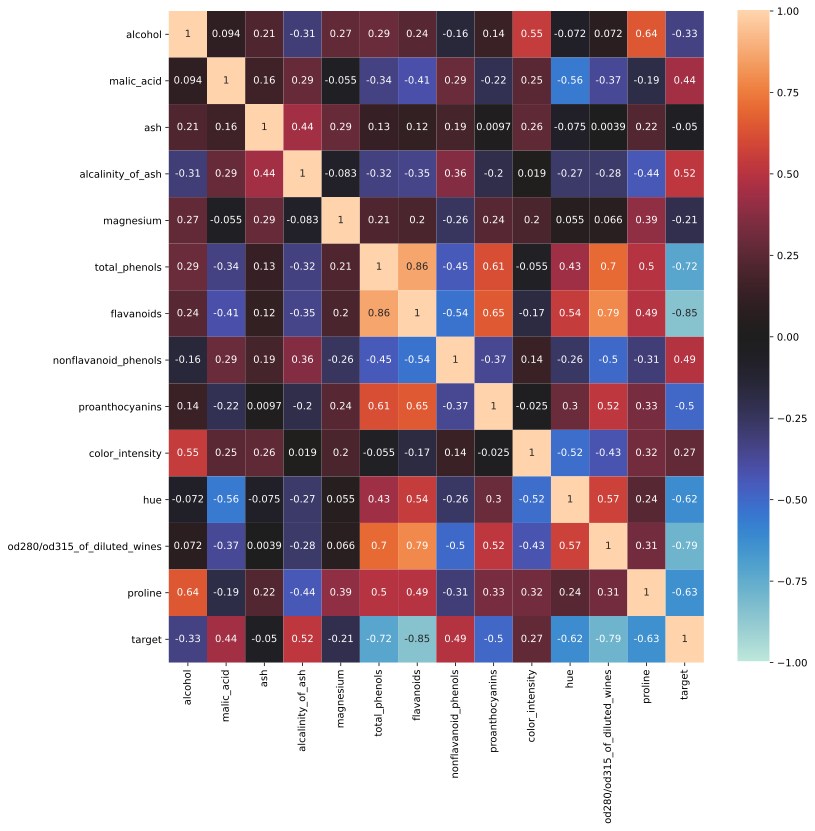

In [71]:
plt.rcParams["figure.figsize"] = (12,12)
sb.heatmap(X_corr, annot = True, fmt = '.2g', vmin = -1, vmax = 1, center = 0)
plt.show()